## About the Dataset
We will be working on a data set that comes from the real estate industry in Boston (US). This database contains 14 attributes. The target variable refers to the median value of owner-occupied homes in 1000 USD's.

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 USD
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: lower status of the population (%)
* MEDV: Median value of owner-occupied homes in 1000 USD's (Target)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

import tensorflow as tf
from tensorflow.keras import Sequential    
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import joblib

## Loading Data

In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'PRICE']

In [3]:
data = pd.read_csv("../data/housing.csv", delim_whitespace=True, header=None)
data.columns = columns
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe().transpose()

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
PRICE    506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
PRICE     25.000000   50.0000

## Data preparation

In [6]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print('Train data:', X_train.shape)
print('Test data:', X_test.shape)

Train data: (354, 13)
Test data: (152, 13)


## Model definition

In [9]:
n_features = X_train.shape[1]

def create_model(n_features):
    # define the model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_features,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    
    return model

model = create_model(n_features)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.metrics.mean_squared_error
       
model.compile(optimizer=optimizer, loss=loss)

## Model training

In [11]:
epochs = 50
callbacks = [EarlyStopping(monitor='val_loss', mode='min',
                           patience=10,
                           restore_best_weights=True)]

In [12]:
model.fit(X_train, y_train,
          shuffle=True,
          callbacks=callbacks,
          epochs=epochs, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 1s 18ms/step - loss: 8743.4580 - val_loss: 6804.9146
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 5729.0391 - val_loss: 4372.4180
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 3624.9963 - val_loss: 2710.6475
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 2192.6934 - val_loss: 1622.2230
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 1282.3744 - val_loss: 928.0855
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 703.4349 - val_loss: 521.3334
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 386.7553 - val_loss: 294.8596
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 220.0526 - val_loss: 182.3174
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 140.7641 - val_loss: 133.8519
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 109.7141 - val_loss

In [13]:
def plot_model_hist(hist, feat='loss', figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.plot(hist.index, hist[f'{feat}'], label='train')
    plt.plot(hist.index, hist[f'val_{feat}'], label='valid')
    plt.xlabel('epoch')
    plt.ylabel(feat)
    plt.legend()
    plt.tight_layout()
    plt.show()

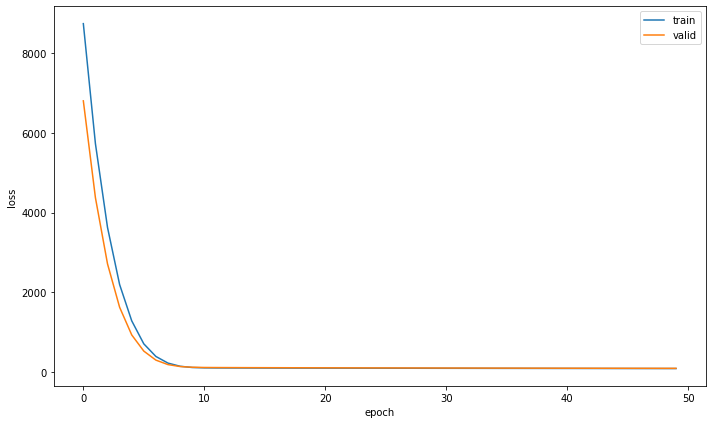

In [14]:
model_hist = pd.DataFrame(model.history.history)
plot_model_hist(model_hist)

In [15]:
print('MSE (train):', model.evaluate(X_train, y_train),
      '\nMSE (test):', model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 1ms/step - loss: 67.0984
MSE (train): 84.0014419555664 
MSE (test): 67.098388671875


In [16]:
# Creating new y_train and y_test arrays based on model results:
y_train_nn = model.predict(X_train)
y_test_nn = model.predict(X_test)

## Training a Tree model

In [17]:
param_dist = {"max_depth": [2, 3, 4],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10]}

clf = RandomizedSearchCV(DecisionTreeRegressor(), param_dist, random_state=42, n_jobs=4,
                         n_iter=30, cv=10, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train_nn)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='neg_mean_squared_error')

In [18]:
tree_regr = clf.best_estimator_
tree_regr.fit(X_train, y_train_nn)

DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)

In [19]:
y_pred_train_tree = tree_regr.predict(X_train)
y_pred_test_tree = tree_regr.predict(X_test)

In [20]:
print('MSE (train):', mean_squared_error(y_train_nn, y_pred_train_tree), 'MSE (test):', mean_squared_error(y_test_nn, y_pred_test_tree),
      '\nMAE (train):', mean_absolute_error(y_train_nn, y_pred_train_tree), 'MAE (test):', mean_absolute_error(y_test_nn, y_pred_test_tree),
      '\nEVS (train):', explained_variance_score(y_train_nn, y_pred_train_tree), 'EVS (test):', explained_variance_score(y_test_nn, y_pred_test_tree),
      '\nR2 (train):', r2_score(y_train_nn, y_pred_train_tree), 'R2 (test):', r2_score(y_test_nn, y_pred_test_tree))

MSE (train): 2.3051062619739056 MSE (test): 4.6323140961190425 
MAE (train): 1.1151121867445688 MAE (test): 1.4776338425523157 
EVS (train): 0.9367720097944053 EVS (test): 0.8867648541994622 
R2 (train): 0.9367720113187619 R2 (test): 0.8857631612977932


In [21]:
joblib.dump(tree_regr, './models/tree_regr.joblib')

['./models/tree_regr.joblib']

## Training a RF model

In [22]:
param_dist = {"max_depth": [2, 3, 4],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              "n_estimators": [1],
              'bootstrap': [True, False],}

clf = RandomizedSearchCV(RandomForestRegressor(), param_dist, random_state=42, n_jobs=4,
                         n_iter=30, cv=10, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train_nn)

C:\Users\weldl\Miniconda3\envs\work\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1]},
                   random_state=42, scoring='neg_mean_squared_error')

In [23]:
rf_regr = clf.best_estimator_
rf_regr.fit(X_train, y_train_nn)

<ipython-input-23-e5666d3e7323>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regr.fit(X_train, y_train_nn)


RandomForestRegressor(bootstrap=False, max_depth=3, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1)

In [24]:
y_pred_train_rf = rf_regr.predict(X_train)
y_pred_test_rf = rf_regr.predict(X_test)

In [25]:
print('MSE (train):', mean_squared_error(y_train_nn, y_pred_train_rf), 'MSE (test):', mean_squared_error(y_test_nn, y_pred_test_rf),
      '\nMAE (train):', mean_absolute_error(y_train_nn, y_pred_train_rf), 'MAE (test):', mean_absolute_error(y_test_nn, y_pred_test_rf),
      '\nEVS (train):', explained_variance_score(y_train_nn, y_pred_train_rf), 'EVS (test):', explained_variance_score(y_test_nn, y_pred_test_rf),
      '\nR2 (train):', r2_score(y_train_nn, y_pred_train_rf), 'R2 (test):', r2_score(y_test_nn, y_pred_test_rf))

MSE (train): 3.6644361658426075 MSE (test): 5.9118409300354395 
MAE (train): 1.45990150424658 MAE (test): 1.8672617010692765 
EVS (train): 0.8994862242035999 EVS (test): 0.8553176731528791 
R2 (train): 0.8994862266268753 R2 (test): 0.8542089321353723


In [26]:
joblib.dump(rf_regr, './models/rf_regr.joblib')

['./models/rf_regr.joblib']